# Classification using Tensorflow

### Logistic Regression using Tensorflow

In [1]:
# We start by loading the libraries, including the request library, because we will access
# the low birth weight data. We will also initiate a session:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [26]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../cache/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cache/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../cache/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../cache/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../cache/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tenso

In [28]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fb97fa9af98>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fbd60abe630>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fb97fa94518>)

In [31]:
mnist.train.num_examples

55000

In [45]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

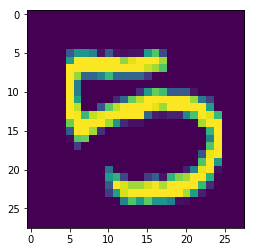

In [48]:
img0 = mnist.train.images[0,:].reshape(28,28)
plt.imshow(img0)

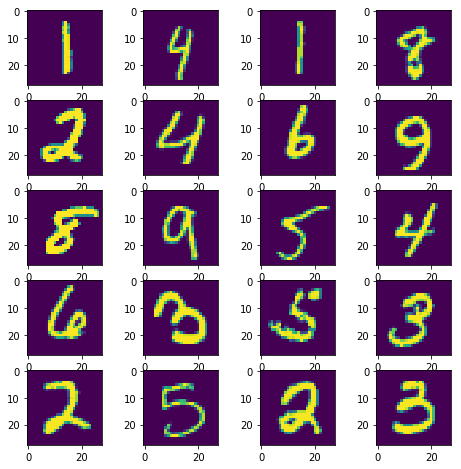

In [49]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
h = 28
w = 28
for i in range(1, columns*rows +1):
    img =  mnist.train.images[i,:].reshape(h,w)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

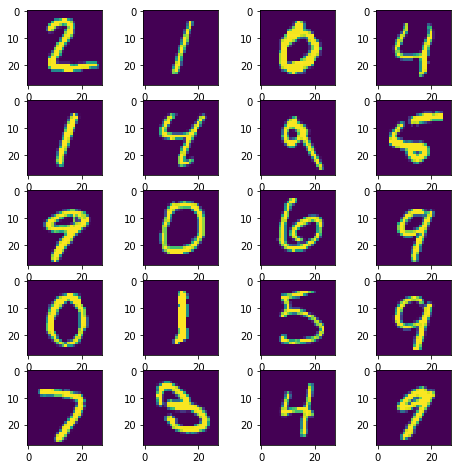

In [50]:
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
h = 28
w = 28
for i in range(1, columns*rows +1):
    img =  mnist.test.images[i,:].reshape(h,w)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [32]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

In [33]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

In [34]:
# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [35]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 1.183730484
Epoch: 0002 cost= 0.665364318
Epoch: 0003 cost= 0.552852053
Epoch: 0004 cost= 0.498684102
Epoch: 0005 cost= 0.465461991
Epoch: 0006 cost= 0.442550008
Epoch: 0007 cost= 0.425461372
Epoch: 0008 cost= 0.412194120
Epoch: 0009 cost= 0.401396282
Epoch: 0010 cost= 0.392403300
Epoch: 0011 cost= 0.384801087
Epoch: 0012 cost= 0.378199825
Epoch: 0013 cost= 0.372423112
Epoch: 0014 cost= 0.367306810
Epoch: 0015 cost= 0.362720270
Epoch: 0016 cost= 0.358608737
Epoch: 0017 cost= 0.354860445
Epoch: 0018 cost= 0.351433977
Epoch: 0019 cost= 0.348334076
Epoch: 0020 cost= 0.345442646
Epoch: 0021 cost= 0.342759355
Epoch: 0022 cost= 0.340252266
Epoch: 0023 cost= 0.337955999
Epoch: 0024 cost= 0.335767718
Epoch: 0025 cost= 0.333687845
Optimization Finished!
Accuracy: 0.9139


### Classification example in Keras

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)
dataframe = pd.read_csv("../datasets/sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [3]:
X.shape, Y.shape

((208, 60), (208,))

In [4]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

The output variable is string values. We must convert them into integer values 0 and 1.

We can do this using the LabelEncoder class from scikit-learn. This class will model the encoding required using the entire dataset via the fit() function, then apply the encoding to create a new output variable using the transform() function.

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [12]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We are going to use scikit-learn to evaluate the model using stratified k-fold cross validation. This is a resampling technique that will provide an estimate of the performance of the model. It does this by splitting the data into k-parts, training the model on all parts except one which is held out as a test set to evaluate the performance of the model. This process is repeated k-times and the average score across all constructed models is used as a robust estimate of performance. It is stratified, meaning that it will look at the output values and attempt to balance the number of instances that belong to each class in the k-splits of the data.

In [26]:
# baseline model
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

We pass the number of training epochs to the KerasClassifier, again using reasonable default values. Verbose output is also turned off given that the model will be created 5 times for the 5-fold cross validation being performed.

In [27]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=16, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)

In [28]:
results

array([0.83720931, 0.76190477, 0.75609756, 0.80487805, 0.75609756])

In [29]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 78.32% (3.26%)
